In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors


In [ ]:
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)


In [ ]:
print("Customers Data Overview:")
print(customers.head())  # Shows first few rows
print(customers.info())  # Shows column data types and non-null values
print(customers.describe())  # Provides summary statistics

print("Products Data Overview:")
print(products.head())
print(products.info())
print(products.describe())

print("Transactions Data Overview:")
print(transactions.head())
print(transactions.info())
print(transactions.describe())


Customers Data Overview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawren

In [ ]:
print("Missing Values in Customers:")
print(customers.isnull().sum())

print("Missing Values in Products:")
print(products.isnull().sum())

print("Missing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


<ipython-input-20-11b4c1b02bb6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


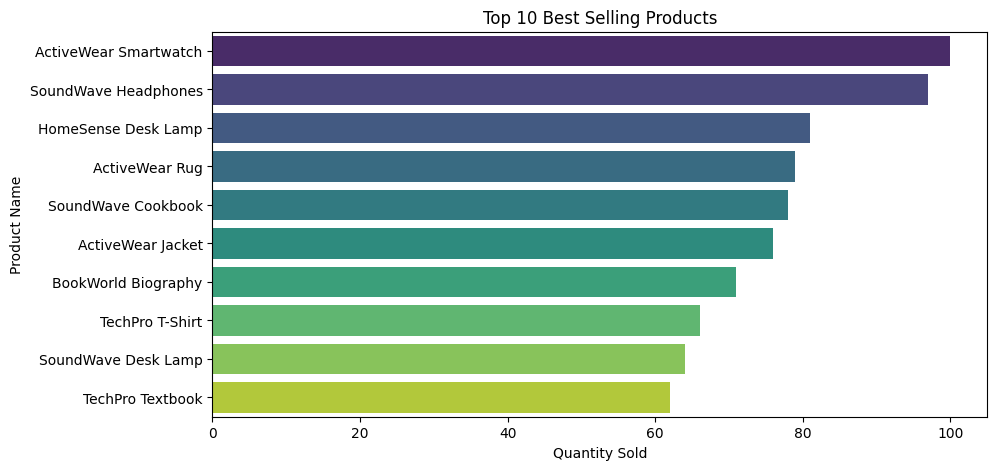

In [ ]:
plt.figure(figsize=(10,5))
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best Selling Products")
plt.show()


<ipython-input-21-d4ba8df12d6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='coolwarm')


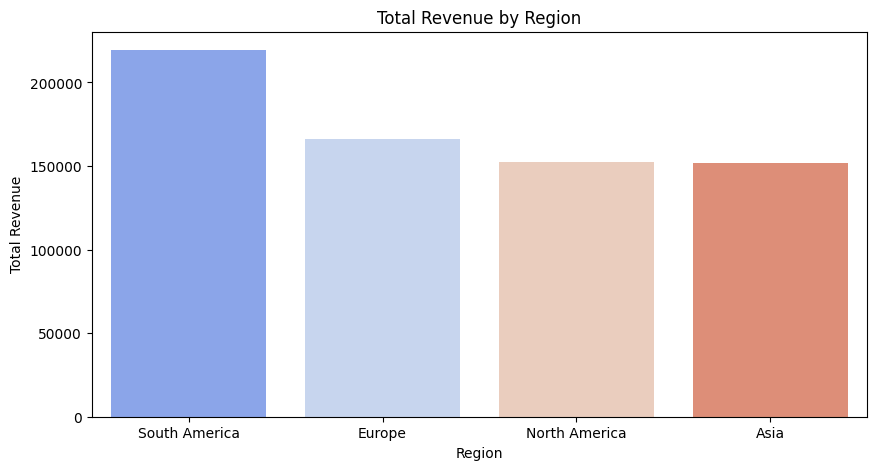

In [ ]:
plt.figure(figsize=(10,5))
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='coolwarm')
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Region")
plt.show()


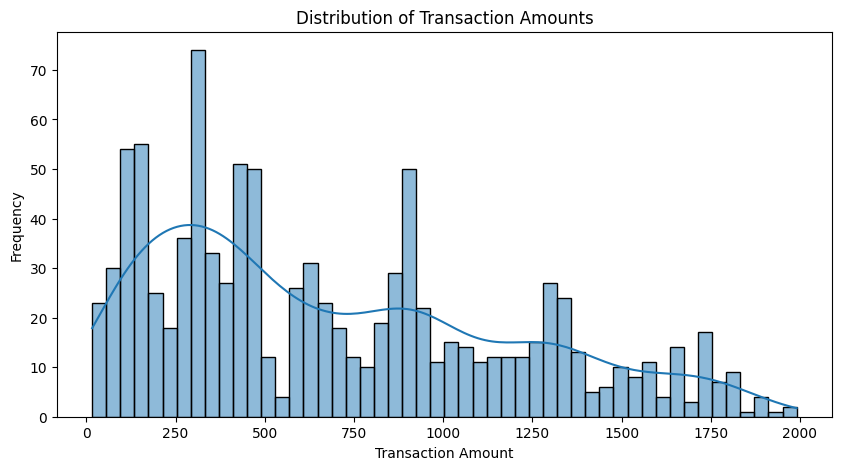

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(merged_df['TotalValue'], bins=50, kde=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show()


<ipython-input-23-9ffb8faaa7e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='magma')


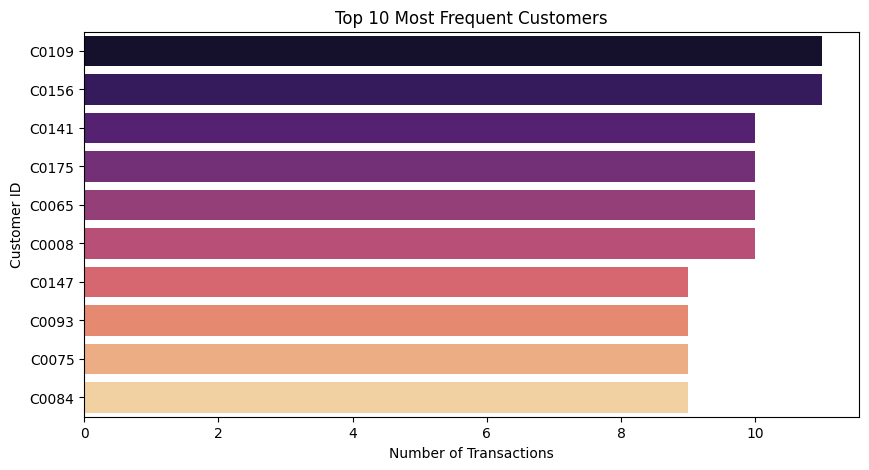

In [ ]:
plt.figure(figsize=(10,5))
top_customers = merged_df['CustomerID'].value_counts().head(10)
sns.barplot(x=top_customers.values, y=top_customers.index, palette='magma')
plt.xlabel("Number of Transactions")
plt.ylabel("Customer ID")
plt.title("Top 10 Most Frequent Customers")
plt.show()


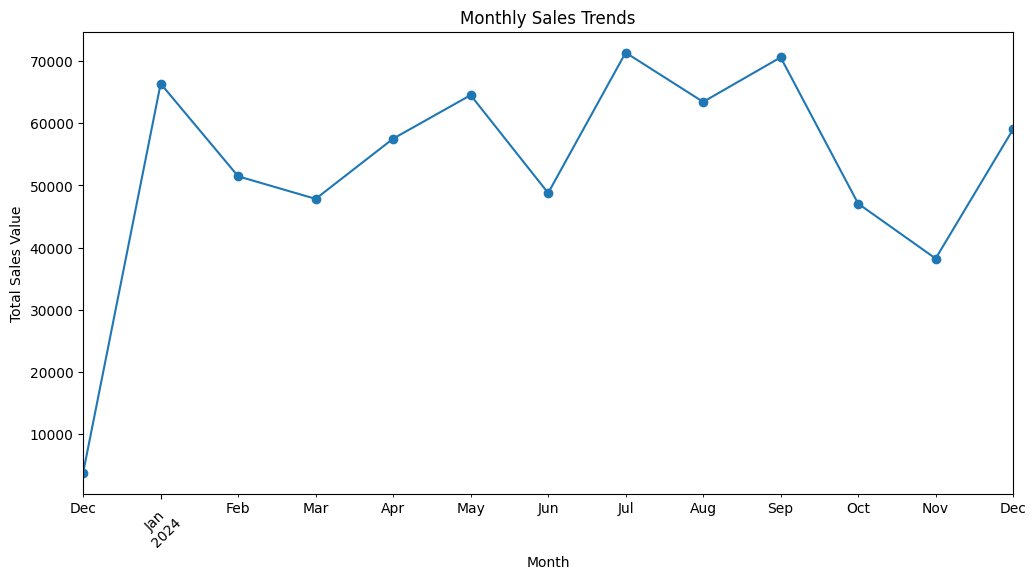

In [ ]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M')

monthly_sales = merged_df.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Total Sales Value")
plt.title("Monthly Sales Trends")
plt.xticks(rotation=45)
plt.show()


In [ ]:
features = merged_df.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features[['TotalValue', 'Quantity']])


In [ ]:
nbrs = NearestNeighbors(n_neighbors=4, metric='euclidean')
nbrs.fit(features_scaled)
distances, indices = nbrs.kneighbors(features_scaled)


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled)
features['Cluster'] = kmeans.labels_


In [ ]:
db_index = davies_bouldin_score(features_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.72127971818163


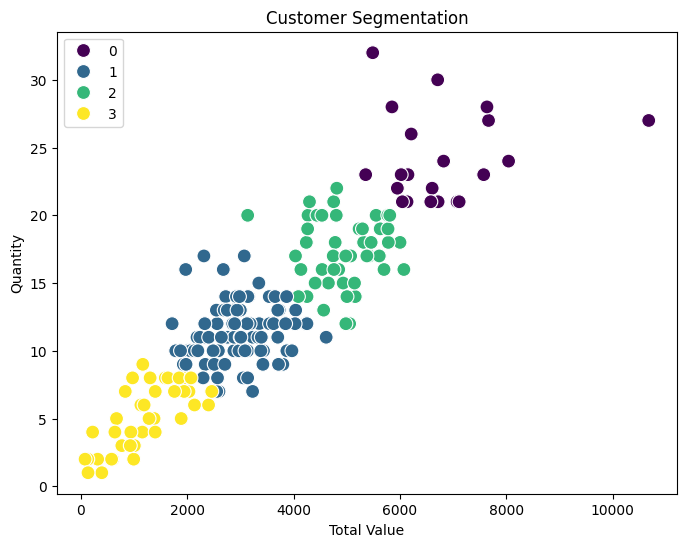

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=features['TotalValue'], y=features['Quantity'], hue=features['Cluster'], palette='viridis', s=100)
plt.xlabel("Total Value")
plt.ylabel("Quantity")
plt.title("Customer Segmentation")
plt.legend()
plt.show()
